**PAQUETERIAS NECESARIAS**

In [1]:
## INCLUYE TODOS LOS PAQUETES A USAR
# FUNCIONES DEFINIDAS PARA USO NECESARIO
import timeit
import time
time_input0 = timeit.default_timer(); # tic del PROCESO INICIAL
import tensorflow as tf
import random
from tensorflow import keras
import pylab as pl # SE TARDA 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import gaussian
from sklearn.model_selection import train_test_split
import h5py as h # manipular extensiones
import mpld3
import statistics as stats # usar media o desviacion estandar
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output # CLEAR EL OUT USING COMMAND
import pickle # PARA GUARDAR LOS DATOS EN UN ARCHIVO EXTERNO
import plotly.graph_objects as go # FIG APILADAS Y SLIDERS
## TIEMPO EN LA CARGA DE LOS MODULOS
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")

Tiempo de ejecucion total        ::  8.85660 segundos


**CONDICIONES INICIALES DE NUESTRA SIMULACION**

In [2]:
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
## CLASE DE LOS VALORES A TENER EN CUENTA
tf.compat.v1.disable_eager_execution()
config = tf.compat.v1.placeholder("float", [None])
config.n_capas  = 2;                    config.exp      = 1;
config.learning_rate = 1e-1; config.cross_entropy = 1;    config.n_iterations  = 3000;
config.dropout       = 0.5;
config.n_step_visual_process = 10;
config.acc_corte = .8;
config.ite_corte = 30;
config.n_iterations_resul_mean = 10 ; # NUMERO DE VECES EN QUE SE REALIZARA LA MISMA OPERACION PARA OBTENER VALORES MEDIOS
## DEFINIR QUE PORCIENTO DE NUESTROS DATOSS SERAN UTILIZADOS
config.datos_porciento = .1 ;
config.datos_eleccion  = 1 ; # Se permutaran los valores para una corrida mas rapida
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

Tiempo de ejecucion total        ::  8.88731 segundos
Tiempo de ejecucion del apartado ::  0.01055 segundos


**ENTRADA Y PROCESAMIENTO INICIAL DE NUESTROS DATOS**

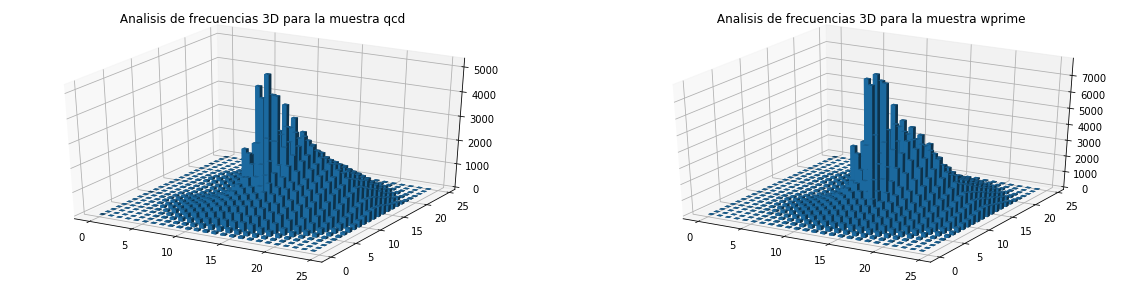

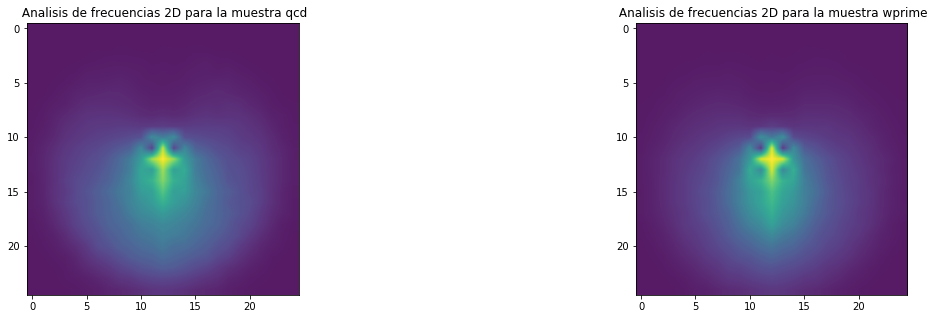

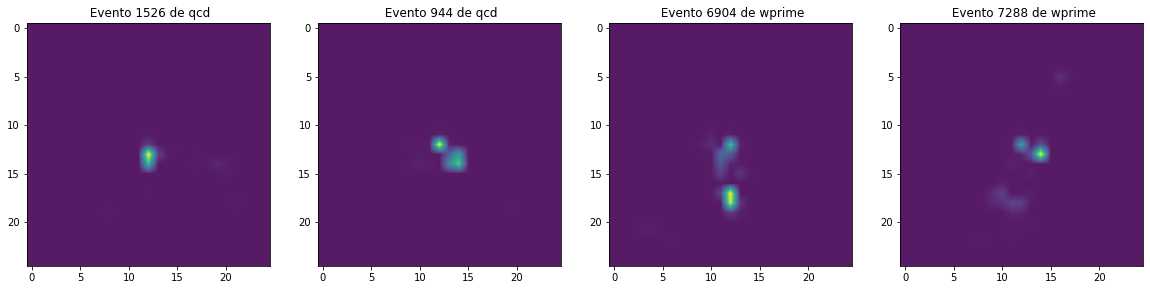

Tiempo de ejecucion total        ::  12.02704 segundos
Tiempo de ejecucion del apartado ::  2.91384 segundos


In [3]:
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
# ENTRAR LA INFORMACION DESDE UN ARCHIVO EXTERNO
FILE  = h.File("DATOS/TODOS.h5", 'r')
INPUT = np.vstack([FILE["qcd/images"][:], FILE["wprime/images"][:]]); INPUT=INPUT/np.max(INPUT) # SE NORMALIZA
INPUT1 =FILE["qcd/images"][:] ;  INPUT2 =FILE["wprime/images"][:] ; 
LABEL = np.hstack([FILE["qcd/labels"][:], FILE["wprime/labels"][:]])
OUTPUT_LINEAL = np.ones((len(LABEL), 2));
OUTPUT_LINEAL[:,0] = LABEL < 1    ;     OUTPUT_LINEAL[:,1] = LABEL > 0

# HISTOGRAMAS DE FRECUENCIA 3D
plt.rcParams['figure.figsize'] = [20, 5]
fig = plt.figure()

ax = fig.add_subplot(121, projection='3d')
frecZ1 = np.zeros((INPUT1.shape[1],INPUT1.shape[2]))
for i in range(INPUT1.shape[1]):
    for j in range(INPUT1.shape[2]):
        frecZ1[i,j] = np.sum(INPUT1[:,i,j]>0) 
frecX, frecY = np.meshgrid(range(INPUT1.shape[1]) , range(INPUT1.shape[2]) , sparse=False, indexing='ij') ; # MATRIX COMBINADA
ax.bar3d(frecX.ravel(), frecY.ravel(), 0 , .5, .5,  frecZ1.ravel(), zsort='average')
plt.title(' Analisis de frecuencias 3D para la muestra qcd') ;

ax = fig.add_subplot(122, projection='3d')
frecZ2 = np.zeros((INPUT2.shape[1],INPUT2.shape[2]))
for i in range(INPUT2.shape[1]):
    for j in range(INPUT2.shape[2]):
        frecZ2[i,j] = np.sum(INPUT2[:,i,j]>0) 
frecX, frecY = np.meshgrid(range(INPUT2.shape[1]) , range(INPUT2.shape[2]) , sparse=False, indexing='ij') ; # MATRIX COMBINADA
ax.bar3d(frecX.ravel(), frecY.ravel(), 0 , .5, .5,  frecZ2.ravel(), zsort='average')
plt.title(' Analisis de frecuencias 3D para la muestra wprime') ;
plt.show()

# HISTOGRAMAS DE FRECUENCIA 2D
ax1=plt.subplot(121)
ax1.imshow(frecZ1, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
plt.title(' Analisis de frecuencias 2D para la muestra qcd') ;
ax2=plt.subplot(122)
ax2.imshow(frecZ2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
plt.title(' Analisis de frecuencias 2D para la muestra wprime') ;
plt.show()

# EJEMPLOS DE EVENTOS
ax11=plt.subplot(141)
n=int(np.round((np.random.rand(1))*INPUT1.shape[0]))
ax11.imshow(INPUT1[n,:,:], cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
plt.title(' Evento ' + str(n) + ' de qcd' ) ;
ax12=plt.subplot(142)
n=int(np.round((np.random.rand(1))*INPUT1.shape[0]))
ax12.imshow(INPUT1[n,:,:], cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
plt.title(' Evento ' + str(n) + ' de qcd' ) ;
ax21=plt.subplot(143)
n=int(np.round((np.random.rand(1))*INPUT2.shape[0]))
ax21.imshow(INPUT2[n,:,:], cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
plt.title(' Evento ' + str(n) + ' de wprime' ) ;
ax22=plt.subplot(144)
n=int(np.round((np.random.rand(1))*INPUT2.shape[0]))
ax22.imshow(INPUT2[n,:,:], cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')
plt.title(' Evento ' + str(n) + ' de wprime' ) ;
plt.show()

#REACONDICIONAR LA INFORMACION INPUT EN UNA MATRIX PARA SU RAPIDO ACCESO
INPUT_LINEAL = np.reshape(INPUT, [len(INPUT),-1]) # LA INFORMACION SE LINEALIZA Y SE LOCALIZA EN LAS FILAS
 # SEPARAR LA INFO PARA ENTRENAR DE LA QUE SERA USADA PARA EL TEST DE CORRESPONDENCIA
if config.datos_eleccion  == 0 :
    INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL, OUTPUT_LINEAL_TEST = train_test_split(
        INPUT_LINEAL, OUTPUT_LINEAL, test_size = config.datos_porciento, shuffle = True);
else :
    INPUT_LINEAL_TEST, INPUT_LINEAL, OUTPUT_LINEAL_TEST, OUTPUT_LINEAL = train_test_split(
        INPUT_LINEAL, OUTPUT_LINEAL, test_size = config.datos_porciento, shuffle = True);

## ELEMENTOS NECESARIOS PARA LA SIMULACION (NO DEBEN VOLVERSE A DEFINIR BAJO NINGUN CONCEPTO)
config.X = tf.compat.v1.placeholder("float", shape = [None,len(INPUT_LINEAL[0,:])]  ) #, name= "input_size2"); # Estructura de la entrada
config.Y = tf.compat.v1.placeholder("float", shape = [None,len(OUTPUT_LINEAL[0,:])] ) #, name= "output_size2") #Estructura de la salida

    
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

In [4]:
print(INPUT.shape) # ORIGINAL
print(INPUT_LINEAL.shape) # ESCOGIDA PARA SIMULACION
print(INPUT_LINEAL_TEST.shape) # ESCOGIDA PARA TEST

(13122, 25, 25)
(1313, 625)
(11809, 625)


**FUNCIONES INICIALES Y NECESARIAS PARA EL ENTRENAMIENTO**

In [5]:
time_input = timeit.default_timer(); # tic del PROCESO INICIAL

In [6]:
## FUNCION PARA LLEVAR LA INFO DE SEGUNDOS A TIEMPO EXTENDIDO (DIAS/HORAS/MINUTOS/SEGUNDOS)
def frantime(segundos):
    dias= np.fix(segundos/86400);                           hor = np.fix( ( segundos - dias*86400 )/3600 ); 
    min = np.fix( ( segundos - dias*86400 - hor*3600)/60 ); seg = np.fix( ( segundos - dias*86400 - hor*3600 - min*60 ) );
    salida = [dias,hor,min,seg]
    return salida

In [7]:
## DEFINICION DE LOS MODOS DE ELECCION DE CAPAS OCULTAS Y NUMEROS DE NEURONAS
def neuronas( config ): #v_input, v_output, n_capas = 2, exp = 1,  modo = 'poly' ):
    #config = Dd()
    x = np.ones(config.n_capas + 2)
    #print(x)
    if  config.exp >= 1: #modo == 'poly':
        for i in range(config.n_capas + 2):
            x[len(x)-i-1] = round(( config.v_input - config.v_output )*pow(i/(config.n_capas + 1 ), config.exp) + config.v_output)
            #print(x[i])
            #print(i)
    elif config.exp < 1:
        for i in range(config.n_capas + 2):
            x[len(x)-i-1] = round(( config.v_input - config.v_output )*pow(i/( config.n_capas + 1 ), -1/config.exp) + config.v_output)
            #print(x[i])
            #print(i)
    config.matrix_neuronas = np.int64(x)
    return config

In [8]:
## GRAFICO 2D DE VARIACION DEL PARAMETRO DE SELECCION NEURONAL POR CAPAS INCLUIDAS
def graf_capas_neuronas( exp , n_capas , config):
    config.exp = exp; config.n_capas  = n_capas;  
    config = neuronas( config )
    for i in range(len(config.matrix_neuronas)):
        if  i == 0:
            X = ["Input"]
        elif i== len(config.matrix_neuronas)-1:
            X.append("Output")
        else: 
            X.append(f"Hidden_{i-1}")
    Y = config.matrix_neuronas#(1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
    pl.bar(X[0], Y[0], facecolor='#ff9999', edgecolor='white')
    pl.bar(X[1:-1], Y[1:-1], facecolor='#9999ff', edgecolor='white')
    pl.bar(X[-1], Y[-1], facecolor='#ff9999', edgecolor='white')

    for x, y in zip(X, Y):
        pl.text(x , y + 0.05, '%.1f' % y, ha='center', va='bottom')
    pl.ylabel(' Number of neurons ') ;         pl.xlabel(' Layers ')
    pl.ylim(0, max(config.matrix_neuronas)*1.2)
    if exp >0:
        pl.text( (n_capas)*4/5 , max(config.matrix_neuronas) , f"Exponente = {exp}")
    else:
        pl.text( (n_capas)*4/5 , max(config.matrix_neuronas) , f"Exponente = 1/{-exp}")
    pl.text( (n_capas)*4/5 , max(config.matrix_neuronas)*85/100 , f"Capas ocultas = {n_capas}")  

In [9]:
## ORGANIZACION DE LA ESTRUCTURA INTERNA DE ENTRENAMIENTO ##
def estructura( INPUT_LINEAL, OUTPUT_LINEAL , config):
    config = neuronas( config )
    #proceso iteractivo dinamico 
    for i in range(len(config.matrix_neuronas)-1):

        weights = tf.Variable( tf.random.truncated_normal([config.matrix_neuronas[i], config.matrix_neuronas[i+1]], stddev=0.1) , 
                              name = f"weights-w{i}")
        biases = tf.Variable(tf.constant(0.1, shape=[config.matrix_neuronas[i+1]]) , name=f"biases_b{i}" )
        
        if  i == 0: # CONDICION INICIAL
            layer = tf.add(tf.matmul( config.X, weights), biases , name=f"layer_l{i}" )
        else: # VALORES INTERNMEDIOS
            layer = tf.add(tf.matmul(    layer, weights), biases , name=f"layer_l{i}" )
    # PARAMETROS FINALES PARA CARACTERIZACION 
    config.cross_entropy = tf.reduce_mean(tf.compat.v2.nn.softmax_cross_entropy_with_logits(labels = config.Y, logits=layer) , 
                                          name= "Definition_of_cross_entropy")
    config.train_step    = tf.compat.v1.train.AdamOptimizer( config.learning_rate ).minimize( config.cross_entropy , 
                                          name= "Definition_of_train_step")
    config.correct_pred  = tf.equal(tf.argmax(layer, 1), tf.argmax( config.Y , 1) , 
                                          name= "Definition_of_correct_pred")
    config.accuracy      = tf.reduce_mean(tf.cast( config.correct_pred  , tf.float32) ,
                                          name= "Definition_of_accuracy")
    return config

In [10]:
## INICIO DE LA ITERACION
def inicio( INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL , OUTPUT_LINEAL_TEST , config , archivo):
    
    init = tf.compat.v1.global_variables_initializer()
    config.cost_summary = tf.compat.v1.summary.scalar("Cost", config.cross_entropy)
    config.acc_summary = tf.compat.v1.summary.scalar("Accuracy", config.accuracy)
    config.all_summary = tf.compat.v1.summary.merge_all()#'''
    with tf.compat.v1.Session() as sess: #tf.Session() as sess:
        writer = tf.compat.v1.summary.FileWriter("Tensorboard", sess.graph)
        sess.run(init)
        toc_general = 0
        config.loss_ALL =[];
        config.acc_ALL  =[];
        for i in range(config.n_iterations):
            tic = time.process_time() ; #timeit.default_timer()
            sess.run(config.train_step, feed_dict={ config.X: INPUT_LINEAL, config.Y:OUTPUT_LINEAL}) # CORRIDA

            config.summary_results, config.loss, config.acc = sess.run([config.all_summary, config.cross_entropy, config.accuracy], 
                                                  feed_dict={config.X: INPUT_LINEAL, config.Y: OUTPUT_LINEAL})
            config.loss_ALL.append(config.loss)
            config.acc_ALL.append(config.acc)
            writer.add_summary(config.summary_results, i)
            
            toc = time.process_time() ; #timeit.default_timer() ;   
            toc_general +=  toc - tic ;
            if (i+1)%config.n_step_visual_process == 0 :
                print("\n | Info del modelo :: Iteration inst : ", '%.f' % i, 
                      "\t | Accuracy =", '%.3f' % config.acc ,
                      "\t | Loss =", '%.3f' % config.loss , 
                      "\t | Time =", '%.3f' % (toc - tic) )
            if  config.tipo_de_corte == 0 and config.acc > config.acc_corte :
                break;
            if  config.tipo_de_corte == 1 and config.ite_corte== i :
                break;
        config.test_accuracy,  config.test_loss = sess.run([config.accuracy, config.cross_entropy], 
                                                           feed_dict={config.X: INPUT_LINEAL_TEST, config.Y: OUTPUT_LINEAL_TEST})
        config.time_ite_mean = toc_general/(i+1) ;
        config.n_iterations_acc = i ;
        print("\n \n \n | Info del modelo :: Iteration Max : " , '%.f' % config.n_iterations_acc , 
              "\t | Accuracy : "                , '%.3f' % config.acc , 
              "\t | Loss : "                    , '%.3f' % config.loss     ,
              "\t | Mean time : " , '%.3f' % config.time_ite_mean  , "\t |")
        print("\n | Info de test :: Accuracy : ", '%.3f' % config.test_accuracy , 
              "\t | Loss : ", '%.3f' % config.test_loss , "\t |")
        
        ## ESCRIBIR EN EL ARCHIVO DE SALIDA
        archivo.write("\n \n \n | Info del modelo :: Iteration Max : " + '%.f' % config.n_iterations_acc + 
              "\t | Accuracy : "                + '%.3f' % config.acc + 
              "\t | Loss : "                    + '%.3f' % config.loss     +
              "\t | Mean time : " + '%.3f' % config.time_ite_mean  + "\t |")
        archivo.write("\n | Info de test :: Accuracy : " + '%.3f' % config.test_accuracy + 
              "\t | Loss : "+ '%.3f' % config.test_loss + "\t |")
        archivo.write("\n |Valores de Accuracy por iteracion |" )
        archivo.write("\n" + str(config.acc_ALL))
        archivo.write("\n |Valores de Perdida por iteracion |" )
        archivo.write("\n" + str(config.loss_ALL))
        
    return config

print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

Tiempo de ejecucion total        ::  12.87315 segundos
Tiempo de ejecucion del apartado ::  0.63348 segundos


In [11]:
config.cosa=[5,4,3]
config.cosa.append(4)
print(config.cosa)

[5, 4, 3, 4]


**CARACTERIZACION DE NUESTRA MUESTRA Y NUESTRO PROCESO DE ENTRENAMIENTO ( REPRESENTACION )**

Tiempo de ejecucion total        ::  13.57102 segundos
Tiempo de ejecucion del apartado ::  0.49553 segundos


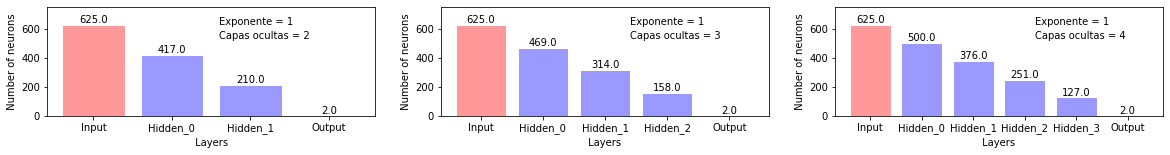

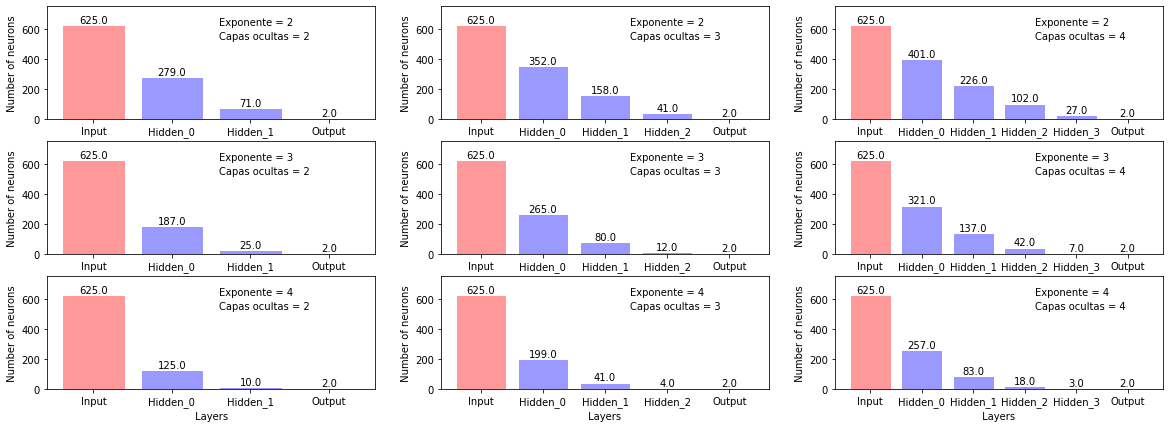

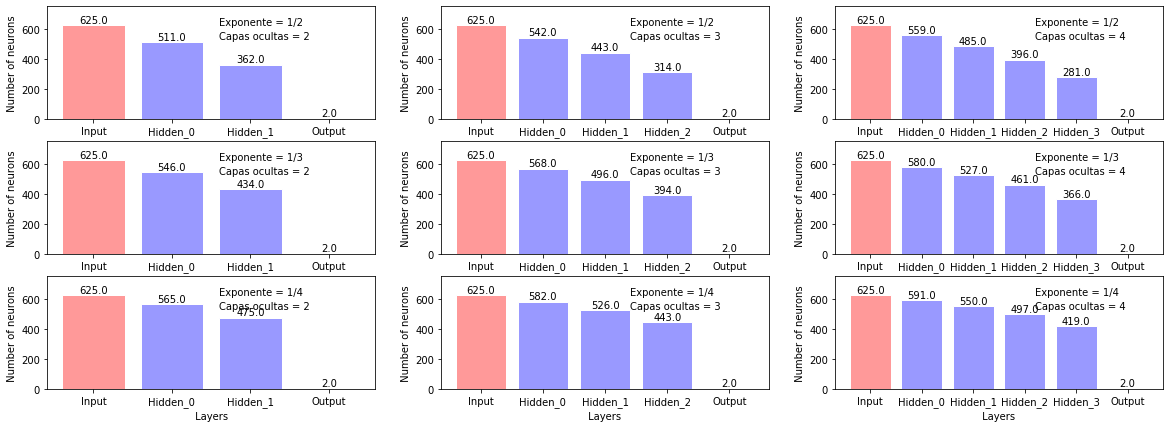

In [12]:
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
# NEURONAS EN LA CAPA DE ENTRADA Y DE SALIDA
config.v_input=  INPUT_LINEAL.shape[1]; 
config.v_output = OUTPUT_LINEAL.shape[1];
# REPRESENTACION DE LA DISTRIBUCION DE NEURONAS ENTRE LAS DIFERENTES CAPAS
plt.rcParams['figure.figsize'] = [20, 2]
plt.figure(1)
plt.subplot(131); graf_capas_neuronas( 1 , 2 , config) 
plt.subplot(132); graf_capas_neuronas( 1 , 3 , config) 
plt.subplot(133); graf_capas_neuronas( 1 , 4 , config)

plt.rcParams['figure.figsize'] = [20, 12]
plt.figure(2)
plt.subplot(531); graf_capas_neuronas( 2 , 2 , config) 
plt.subplot(532); graf_capas_neuronas( 2 , 3 , config) 
plt.subplot(533); graf_capas_neuronas( 2 , 4 , config)
plt.subplot(534); graf_capas_neuronas( 3 , 2 , config) 
plt.subplot(535); graf_capas_neuronas( 3 , 3 , config) 
plt.subplot(536); graf_capas_neuronas( 3 , 4 , config)
plt.subplot(537); graf_capas_neuronas( 4 , 2 , config) 
plt.subplot(538); graf_capas_neuronas( 4 , 3 , config) 
plt.subplot(539); graf_capas_neuronas( 4 , 4 , config) 
plt.figure(3)
plt.subplot(531); graf_capas_neuronas( -2 , 2 , config) 
plt.subplot(532); graf_capas_neuronas( -2 , 3 , config) 
plt.subplot(533); graf_capas_neuronas( -2 , 4 , config) 
plt.subplot(534); graf_capas_neuronas( -3 , 2 , config) 
plt.subplot(535); graf_capas_neuronas( -3 , 3 , config) 
plt.subplot(536); graf_capas_neuronas( -3 , 4 , config) 
plt.subplot(537); graf_capas_neuronas( -4 , 2 , config) 
plt.subplot(538); graf_capas_neuronas( -4 , 3 , config) 
plt.subplot(539); graf_capas_neuronas( -4 , 4 , config) 

print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

In [13]:
## CARACTERIZAR SI CAMBIA EL TIEMPO MEDIO DE UNA ITERACION CON LA VARIACION DE LAS CAPAS Y NEURONAS
##PARA UN learning_rate = CONST = .1
#print("cosa")
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
f = open ('log_eventos_z1z2z3.txt','w') # CREAR ARCHIVO TXT PARA GUARDAR LA INFO DEL PROCESO DE CARACTERIZACION
config.learning_rate = .01 ; 
config.acc_corte = .9; 
config.n_step_visual_process = 600;
config.n_iterations_resul_mean = 10;
config.tipo_de_corte = 0; # 0 es por accuracy y 1 es por iteraciones
#print(config)
exp = [-4, -3, -2, 1, 2, 3, 4]   ;   n_capas = [1, 2, 3, 4, 5, 6]   ;  exp_str =str(exp).strip('][)').split(',')
for i in range(len(exp_str)):    exp_str[i] = "(" + exp_str[i] + ")"
X, Y = np.meshgrid(exp , n_capas, sparse=False, indexing='ij') ; # MATRIX COMBINADA
Z_1  = np.zeros(X.shape) ;  Z_2  = np.zeros(X.shape) ;  Z_3  = np.zeros(X.shape) ; # ENTRADA DE LOS VALORES
dZ_1 = np.zeros(X.shape) ;  dZ_2 = np.zeros(X.shape) ;  dZ_3 = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
Z_1_var = np.zeros(X.shape) ;  Z_2_var = np.zeros(X.shape) ;  Z_3_var = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
for x in range( X.shape[0] ): 
    #print(x)
    for y in range( Y.shape[1] ):
        #print(y)
        time_ite_ALL         = np.ones(config.n_iterations_resul_mean) ;
        loss_ALL             = np.ones(config.n_iterations_resul_mean);
        n_iterations_acc_ALL = np.ones(config.n_iterations_resul_mean) ;
        config.exp = X[ x , y ] ;               config.n_capas = Y[ x , y ]
        
        config = estructura( INPUT_LINEAL, OUTPUT_LINEAL , config ); # ACTUALIZAR LA ESTRUCTURA PARA ENTRENAR
        for i in range(config.n_iterations_resul_mean):
            config = inicio( INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL , OUTPUT_LINEAL_TEST , config , f ) # CORRER EL PROGRAMA
            # INCLUIR DENTRO DEL VECTOR DE RESULTADOS
            time_ite_ALL[i]         = config.time_ite_mean ;
            loss_ALL[i]             = config.loss ;
            n_iterations_acc_ALL[i] = config.n_iterations_acc ;
            '''if i == config.n_iterations_resul_mean-1:
                print(time_ite_ALL)
                print(loss_ALL)
                print(n_iterations_acc_ALL)'''
       
        # OBTENER LOS VALORES IMPORTANTES DE CADA ITERACION
        Z_1[ x , y ] = stats.mean( time_ite_ALL );         dZ_1[ x , y ] = stats.stdev( time_ite_ALL );
        Z_1_var[ x , y ] = np.var( time_ite_ALL );
        Z_2[ x , y ] = stats.mean( loss_ALL );             dZ_2[ x , y ] = stats.stdev( loss_ALL );
        Z_2_var[ x , y ] = np.var( loss_ALL );
        Z_3[ x , y ] = stats.mean( n_iterations_acc_ALL ); dZ_3[ x , y ] = stats.stdev( n_iterations_acc_ALL );
        Z_3_var[ x , y ] = np.var( n_iterations_acc_ALL );
        # MENSAJE DE SALIDA    
        clear_output() # CLEAR PREVIOS INFO
        print(x, " " , y , " ", X.shape[0], " ",Y.shape[1],  " ", " ")
        porciento = 100 * ( ( x )*Y.shape[1] + y + 1 )/( X.shape[0]*Y.shape[1] ); # PORCIENTO DEL PROCESO DE SALIDA
        time_pass = frantime(np.abs(timeit.default_timer() - time_input )); # TIEMPO EN QUE OCURREN LOS PROCESOS
        time_will = frantime(np.abs(timeit.default_timer() - time_input )/(porciento /100) ); # TIEMPO EN QUE OCURREN LOS PROCESOS
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        print( "\n AVANCE :: " , "\t Progreso de todo el evento : " , '%.1f '%porciento , "%", 
               "\n        :: Tiempo de ejecucion : ", '%.f'%float(time_pass[0]), "/" , '%.f'%float(time_pass[1]), "/"
                             , '%.f'%float(time_pass[2]), "/", '%.f'%float(time_pass[3]),
               "\t % :: Tiempo esperado para terminar : ", '%.f'%float(time_will[0]), "/" , '%.f'%float(time_will[1]), "/"
                             , '%.f'%float(time_will[2]), "/", '%.f'%float(time_will[3])
             );
        print( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        print( "\n Valores de Exponencial : " , '%.f' % X[ x , y ] , 
               "\t :: Numeros de Capas : "    , '%.f' % Y[ x , y ])     
        print( "\n Valores Medios de :: Tiempo de una iteracion   : ", '%.3f' %Z_1[x,y] , " + ", '%.3f' % dZ_1[x,y] )
        print( "\n Valores Medios de :: Perdida                   : ", '%.3f' %Z_2[x,y] , " + ", '%.3f' % dZ_2[x,y] )
        print( "\n Valores Medios de :: Iteracion de convergencia : ", '%.1f' %Z_3[x,y] , " + ", '%.1f' % dZ_3[x,y] )
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        # IMPRIMIR LA INFORMACION EN EL ARCHIVO EXTERNO
        f.write( "\n" + "\n " + "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <")
        f.write( "\n AVANCE :: " + "\t Progreso de todo el evento : " + '%.1f '%porciento + "%" + 
               "\n        :: Tiempo de ejecucion : " + '%.f '%float(time_pass[0])+ "/" + '%.f'%float(time_pass[1])+ "/"
                             + '%.f'%float(time_pass[2]) + "/" + '%.f'%float(time_pass[3])+
               "\t % :: Tiempo esperado para terminar : "+ '%.f'%float(time_will[0])+ "/" + '%.f'%float(time_will[1])+ "/"
                             + '%.f'%float(time_will[2])+ "/"+ '%.f'%float(time_will[3])
             );
        f.write( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        f.write( "\n Valores de Exponencial : " + '%.f' % X[ x , y ] + 
               "\t :: Numeros de Capas : "    + '%.f' % Y[ x , y ])   
        f.write( "\n Valores Medios de :: Tiempo de una iteracion   : " + '%.3f' %Z_1[x,y] + " + "+ '%.3f' % dZ_1[x,y] )
        f.write( "\n Valores Medios de :: Perdida                   : " + '%.3f' %Z_2[x,y] + " + "+ '%.3f' % dZ_2[x,y] )
        f.write( "\n Valores Medios de :: Iteracion de convergencia : " + '%.1f' %Z_3[x,y] + " + "+ '%.1f' % dZ_3[x,y] )
        f.write( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" + "\n" + "\n " );
# INFO TIME         
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

0   4   7   6    
> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <

 AVANCE ::  	 Progreso de todo el evento :  11.9  % 
        :: Tiempo de ejecucion :  0 / 0 / 4 / 14 	 % :: Tiempo esperado para terminar :  0 / 0 / 35 / 40
   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   

 Valores de Exponencial :  -4 	 :: Numeros de Capas :  5

 Valores Medios de :: Tiempo de una iteracion   :  0.849  +  0.011

 Valores Medios de :: Perdida                   :  5.089  +  3.906

 Valores Medios de :: Iteracion de convergencia :  30.6  +  15.0
> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <

 
 
 | Info del modelo :: Iteration Max :  40 	 | Accuracy :  0.918 	 | Loss :  6.503 	 | Mean time :  1.090 	 |

 | Info de test :: Accuracy :  0.926 	 | Loss :  6.333 	 |

 
 
 | Info del modelo :: Iteration Max :  30 	 | Accuracy :  0.917 	 | Loss :  67.912 	 | Mean time :  1.081 	 |

 | Info

KeyboardInterrupt: 

In [ ]:
'''## SAlVAR NUESTRAS VARIABLES PARA USO FUTURO
output = open('Var_z1z2z3.pkl', 'wb') # CREAR EL ARCHIVO DE GUARDADO
# Pickle dictionary using protocol 0.
pickle.dump( X ,output)   ;  pickle.dump( Y ,output) ; 
pickle.dump( Z_1,output)   ;   pickle.dump( Z_2,output)   ;   pickle.dump( Z_3,output)   ;
pickle.dump( dZ_1,output)  ;  pickle.dump( dZ_2,output)   ;  pickle.dump( dZ_3,output)   ;
#pickle.dump([ Z_1 , Z_2 , Z_3 , dZ_1 , dZ_2 , dZ_3 ],output)
output.close()'''

In [14]:
exp = [-4, -3, -2, 1, 2, 3, 4]   ;   n_capas = [1, 2, 3, 4, 5, 6]   ;  exp_str =str(exp).strip('][)').split(',')
for i in range(len(exp_str)):    exp_str[i] = "(" + exp_str[i] + ")"

In [16]:
## CARGAR NUESTRAS VARIABLES PARA USO 
pkl_file = open('Var_z1z2z3.pkl', 'rb')
X    = pickle.load(pkl_file)  ; Y    = pickle.load(pkl_file) ; 
Z_1  = pickle.load(pkl_file)  ; Z_2  = pickle.load(pkl_file) ; Z_3 = pickle.load(pkl_file)  ;
dZ_1 = pickle.load(pkl_file)  ; dZ_2 = pickle.load(pkl_file) ; dZ_3 = pickle.load(pkl_file) ;
pkl_file.close()

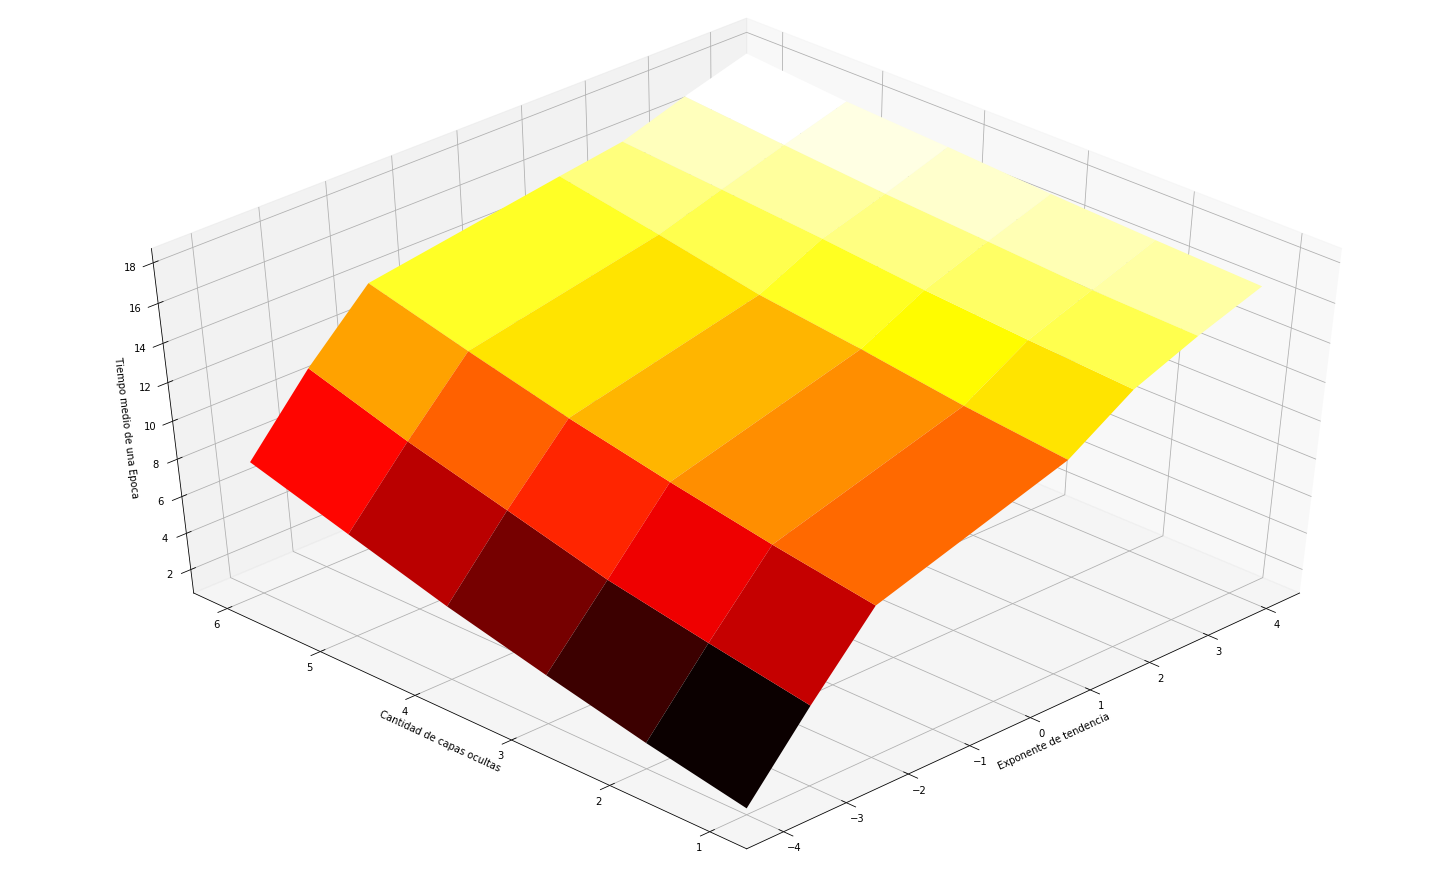

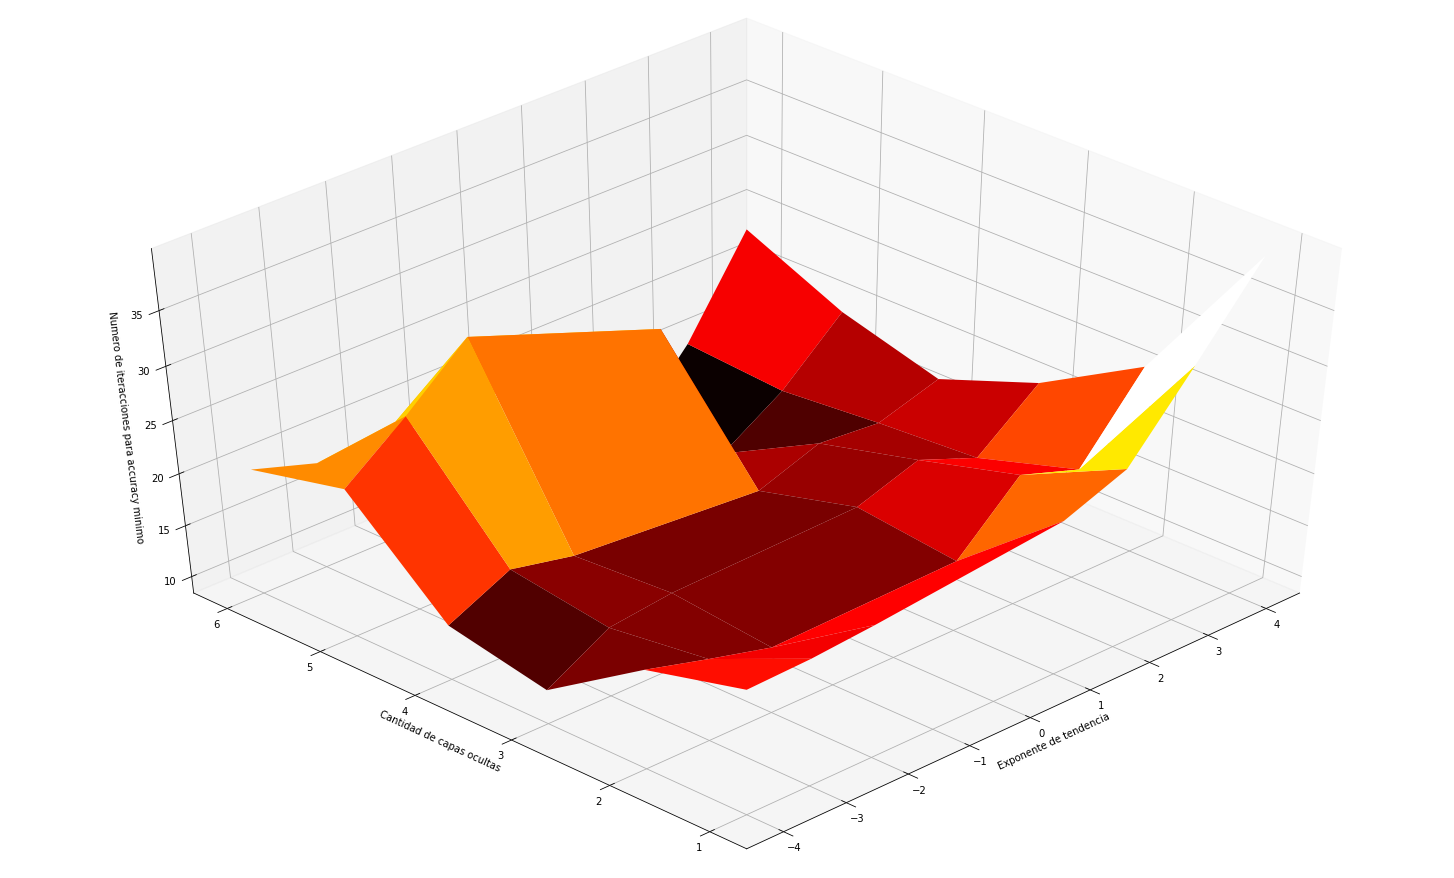

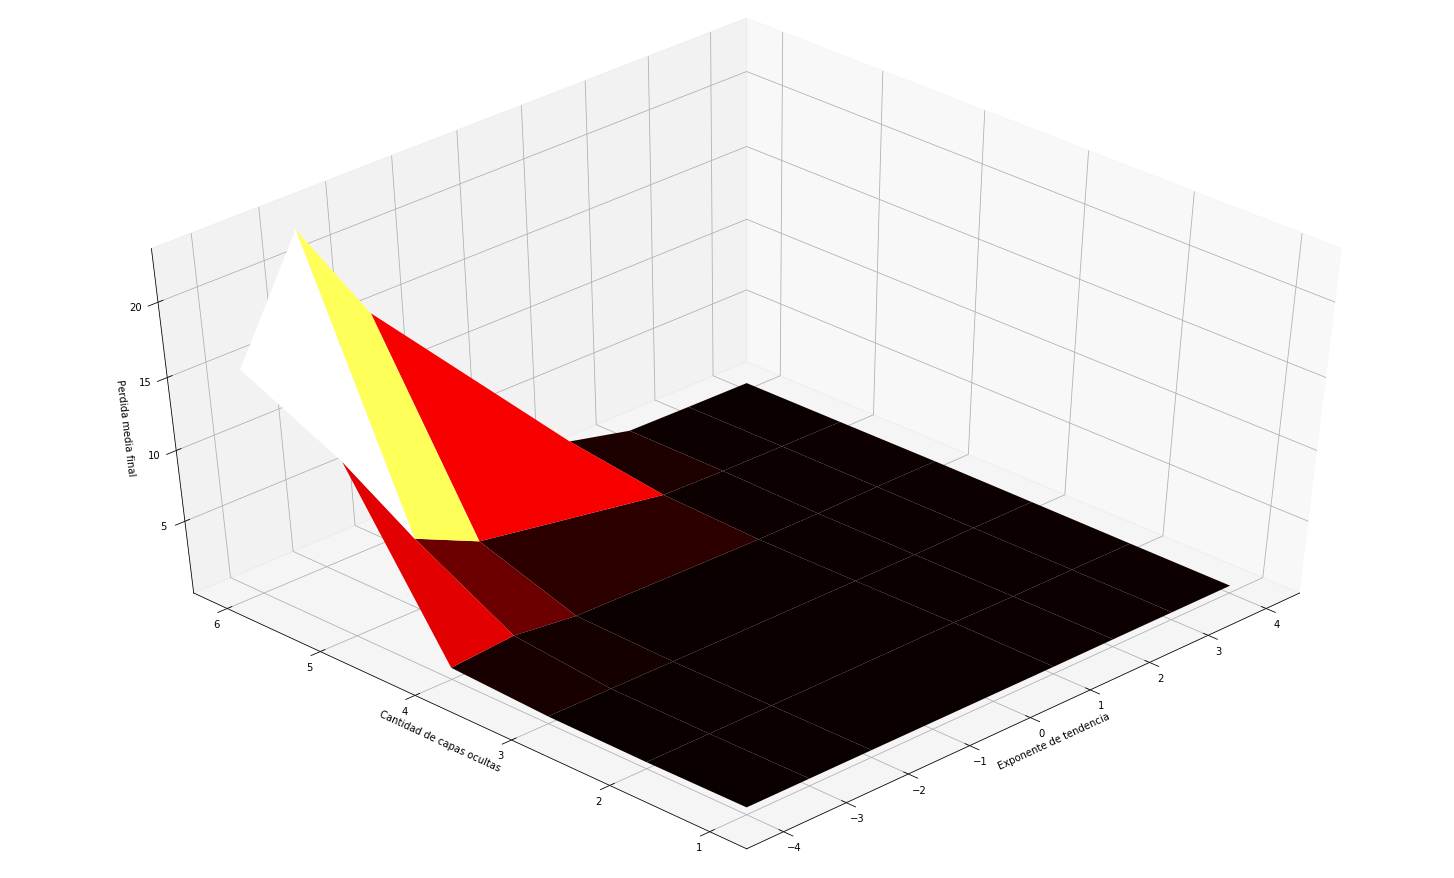

In [17]:
## GRAFICOS 3D PARA CARACTERIZACION
plt.rcParams['figure.figsize'] = [20, 12]
fig = pl.figure(1) ;  ax = Axes3D(fig) ;
ax.plot_surface(X, Y, Z_1, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel(' Exponente de tendencia ') ;
ax.set_ylabel(' Cantidad de capas ocultas ') ;
ax.set_zlabel(' Tiempo medio de una Epoca ') ;
ax.view_init(45,225)

fig = pl.figure(2) ;  ax = Axes3D(fig) ;
ax.plot_surface(X, Y, Z_3, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel(' Exponente de tendencia ') ;
ax.set_ylabel(' Cantidad de capas ocultas ') ;
ax.set_zlabel(' Numero de iteracciones para accuracy minimo ') ;
ax.view_init(45,225)

fig = pl.figure(3) ;  ax = Axes3D(fig) ;
ax.plot_surface(X, Y, Z_2, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel(' Exponente de tendencia ') ;
ax.set_ylabel(' Cantidad de capas ocultas ') ;
ax.set_zlabel(' Perdida media final ') ;
ax.view_init(45,225)

In [21]:
## GRAFICOS 2D CON SLIDERS PARA POSIBLE CARACTERIZACION
# Create figure
#import plotly.graph_objects as go
fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, X.shape[0] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=Y[i,:], y=Z_1[i,:], mode='markers', name='measured z1 graf 1', 
        error_y=dict( type='data', array=dZ_1[i,:], arrayminus = dZ_1[i,:] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(X[i,0]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Exponente de tendencia graficado: "}, pad={"t": 20}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_1 - dZ_1), np.max(Z_1 + dZ_1)]), 
    xaxis_title="Cantidad de capas ocultas", yaxis_title="Tiempo medio de una Epoca", 
    title=" Variación del tiempo de épocas vs Exponente de tendencia",)
fig.show()

## GRAFICO DE LA OTRA DIMENSION 
fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, Y.shape[1] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=exp_str, y=Z_1[:,i], mode='markers', name='measured Z1 graf 2', 
        error_y=dict( type='data', array=dZ_1[:,i], arrayminus = dZ_1[:,i] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(Y[0,i]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Cantidad de capas ocultas graficado: "}, pad={"t": 20}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_1 - dZ_1), np.max(Z_1 + dZ_1)]), 
    xaxis_title="Exponente de tendencia", yaxis_title="Tiempo medio de una Epoca", 
    title=" Variación del tiempo de épocas vs Capas ocultas",)
fig.show()

In [22]:
## GRAFICOS 2D CON SLIDERS PARA POSIBLE CARACTERIZACION
# Create figure
#import plotly.graph_objects as go
fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, X.shape[0] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=Y[i,:], y=Z_2[i,:], mode='markers', name='measured z2 graf 1', 
        error_y=dict( type='data', array=dZ_2[i,:], arrayminus = dZ_2[i,:] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(X[i,0]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Exponente de tendencia graficado: "}, pad={"t": 20}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_2 - dZ_2), np.max(Z_2 + dZ_2)]), 
    xaxis_title="Cantidad de capas ocultas", yaxis_title="Valor de la perdida al finalizar", 
    title=" Variación de la perdida al terminar el ajuste vs Exponente de tendencia",)
fig.show()

## GRAFICO DE LA OTRA DIMENSION 

fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, Y.shape[1] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=exp_str, y=Z_2[:,i], mode='markers', name='measured z2 graf 2', 
        error_y=dict( type='data', array=dZ_2[:,i], arrayminus = dZ_2[:,i] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(Y[0,i]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Cantidad de capas ocultas graficado: "}, pad={"t": 20}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_2 - dZ_2), np.max(Z_2 + dZ_2)]), 
    xaxis_title="Exponente de tendencia", yaxis_title="Valor de la perdida al finalizar", 
    title=" Variación de la perdida al terminar el ajuste vs Capas ocultas",)
fig.show()


In [23]:
## GRAFICOS 2D CON SLIDERS PARA POSIBLE CARACTERIZACION
# Create figure
#import plotly.graph_objects as go
fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, X.shape[0] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=Y[i,:], y=Z_3[i,:], mode='markers', name='measured z3 graf 1', 
        error_y=dict( type='data', array=dZ_3[i,:], arrayminus = dZ_3[i,:] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(X[i,0]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Exponente de tendencia graficado: "}, pad={"t": 20}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_3 - dZ_3), np.max(Z_3 + dZ_3)]), 
    xaxis_title="Cantidad de capas ocultas", yaxis_title="Iteracion final", 
    title=" Iteracion en la que se logra la convergencia vs Exponente de tendencia",)
fig.show()

## GRAFICO DE LAS OTRA DIMENSION 

fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, Y.shape[1] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x= exp_str, y=Z_3[:,i], mode='markers', name='measured z3 graf 2', 
        error_y=dict( type='data', array=dZ_3[:,i], arrayminus = dZ_3[:,i] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(Y[0,i]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Cantidad de capas ocultas graficado: "}, pad={"t": 20}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_3 - dZ_3), np.max(Z_3 + dZ_3)]), 
    xaxis_title="Exponente de tendencia", yaxis_title="Iteracion final", 
    title=" Iteracion en la que se logra la convergencia vs Capas ocultas",)
fig.show()


In [24]:
## GRAFICOS 2D CON SLIDERS PARA POSIBLE CARACTERIZACION
# Create figure
#import plotly.graph_objects as go
fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, X.shape[0] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=Y[i,:], y=Z_1[i,:]*Z_3[i,:], mode='markers', name='measured z1Z3 graf 1', 
        error_y=dict( type='data', array=dZ_1[i,:]*dZ_3[i,:], arrayminus = dZ_1[i,:]*dZ_3[i,:] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(X[i,0]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Exponente de tendencia graficado: "}, pad={"t": 50}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_1*Z_3 - dZ_1*dZ_3), np.max(Z_1*Z_3 - dZ_1*dZ_3)]), 
    xaxis_title="Cantidad de capas ocultas", yaxis_title="Tiempo de Ejecucion Total", 
    title=" Variación del tiempo de Ejecución vs Exponente de tendencia",)
fig.show()

## GRAFICO DE LA OTRA DIMENSION 
fig = go.Figure()
#fig.show(block=True)
# Add traces, one for each slider step
for i in np.arange(0, Y.shape[1] , 1):
    fig.add_trace(go.Scatter(  visible=False,
        x=exp_str, y=Z_1[:,i]*Z_3[:,i], mode='markers', name='measured Z1Z3 graf 2', 
        error_y=dict( type='data', array=dZ_1[:,i]*dZ_3[:,i], arrayminus = dZ_1[:,i]*dZ_3[:,i] , color='purple', thickness=1.5, width=3) ) )
fig.data[0].visible = True# Make 10th trace visible
# Create and add slider
steps = [];
for i in range(len(fig.data)):
    #print(step)
    step = dict( method="restyle", args  =["visible", [False] * len(fig.data)], label = str(Y[0,i]) )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict( active=10, currentvalue={"prefix": "Cantidad de capas ocultas graficado: "}, pad={"t": 50}, steps=steps )]
fig.update_layout( sliders=sliders )
fig.update_layout(
    yaxis  = dict(range=[np.min(Z_1*Z_3 - dZ_1*dZ_3), np.max(Z_1*Z_3 - dZ_1*dZ_3)]), 
    xaxis_title="Exponente de tendencia", yaxis_title="Tiempo de Ejecucion Total", 
    title=" Variación del tiempo de Ejecución vs Capas ocultas",)
fig.show()

**CONOCER COMO SE COMPORTA BAJO LAS MEJORES CONDICIONES POSIBLES ENCONTRADAS EN NUESTRA SIMULACION**

In [37]:
## CONOCER COMO SE COMPORTA BAJO LAS MEJORES CONDICIONES POSIBLES ENCONTRADAS EN NUESTRA SIMULACION
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
f = open ('log_eventos_z1z2z3_EXP_4m_CAPAS_1.txt','w') # CREAR ARCHIVO TXT PARA GUARDAR LA INFO DEL PROCESO DE CARACTERIZACION
config.learning_rate = .01 ; 
config.acc_corte = .95; 
config.n_step_visual_process = 500;
config.n_iterations_resul_mean = 10;
config.tipo_de_corte = 0; # 0 es por accuracy y 1 es por iteraciones
#print(config)
exp = [-4]      ;   exp = X
n_capas = [1]   ;   n_capas = Y ; exp_str =str(exp).strip('][)').split(',')
#X, Y = np.meshgrid(exp , n_capas, sparse=False, indexing='ij') ; # MATRIX COMBINADA
CZ_1  = np.zeros(X.shape) ;  CZ_2  = np.zeros(X.shape) ;  CZ_3  = np.zeros(X.shape) ; # ENTRADA DE LOS VALORES
CdZ_1 = np.zeros(X.shape) ;  CdZ_2 = np.zeros(X.shape) ;  CdZ_3 = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
CZ_1_var = np.zeros(X.shape) ;  CZ_2_var = np.zeros(X.shape) ;  CZ_3_var = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
for x in range( X.shape[0] ): 
    #print(x)
    for y in range( Y.shape[1] ):
        #print(y)
        time_ite_ALL         = np.ones(config.n_iterations_resul_mean) ;
        loss_ALL             = np.ones(config.n_iterations_resul_mean);
        n_iterations_acc_ALL = np.ones(config.n_iterations_resul_mean) ;
        config.exp = X[ x , y ] ;               config.n_capas = Y[ x , y ]
        
        config = estructura( INPUT_LINEAL, OUTPUT_LINEAL , config ); # ACTUALIZAR LA ESTRUCTURA PARA ENTRENAR
        for i in range(config.n_iterations_resul_mean):
            config = inicio( INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL , OUTPUT_LINEAL_TEST , config , f ) # CORRER EL PROGRAMA
            # INCLUIR DENTRO DEL VECTOR DE RESULTADOS
            time_ite_ALL[i]         = config.time_ite_mean ;
            loss_ALL[i]             = config.loss ;
            n_iterations_acc_ALL[i] = config.n_iterations_acc ;
            '''if i == config.n_iterations_resul_mean-1:
                print(time_ite_ALL)
                print(loss_ALL)
                print(n_iterations_acc_ALL)'''
       
        # OBTENER LOS VALORES IMPORTANTES DE CADA ITERACION
        CZ_1[ x , y ] = stats.mean( time_ite_ALL );         CdZ_1[ x , y ] = stats.stdev( time_ite_ALL );
        CZ_1_var[ x , y ] = np.var( time_ite_ALL );
        CZ_2[ x , y ] = stats.mean( loss_ALL );             CdZ_2[ x , y ] = stats.stdev( loss_ALL );
        CZ_2_var[ x , y ] = np.var( loss_ALL );
        CZ_3[ x , y ] = stats.mean( n_iterations_acc_ALL ); CdZ_3[ x , y ] = stats.stdev( n_iterations_acc_ALL );
        CZ_3_var[ x , y ] = np.var( n_iterations_acc_ALL );
        # MENSAJE DE SALIDA  ( RESUMEN )  
        print(x, " " , y , " ", X.shape[0], " ",Y.shape[1],  " ", " ")
        porciento = 100 * ( ( x )*Y.shape[1] + y + 1 )/( X.shape[0]*Y.shape[1] ); # PORCIENTO DEL PROCESO DE SALIDA
        time_pass = frantime(np.abs(timeit.default_timer() - time_input )); # TIEMPO EN QUE OCURREN LOS PROCESOS
        time_will = frantime(np.abs(timeit.default_timer() - time_input )/(porciento /100) ); # TIEMPO EN QUE OCURREN LOS PROCESOS
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        print( "\n AVANCE :: " , "\t Progreso de todo el evento : " , '%.1f '%porciento , "%", 
               "\n        :: Tiempo de ejecucion : ", '%.f'%float(time_pass[0]), "/" , '%.f'%float(time_pass[1]), "/"
                             , '%.f'%float(time_pass[2]), "/", '%.f'%float(time_pass[3]),
               "\t % :: Tiempo esperado para terminar : ", '%.f'%float(time_will[0]), "/" , '%.f'%float(time_will[1]), "/"
                             , '%.f'%float(time_will[2]), "/", '%.f'%float(time_will[3])
             );
        print( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        print( "\n Valores de Exponencial : " , '%.f' % X[ x , y ] , 
               "\t :: Numeros de Capas : "    , '%.f' % Y[ x , y ])     
        print( "\n Valores Medios de :: Tiempo de una iteracion   : ", '%.3f' %Z_1[x,y] , " + ", '%.3f' % dZ_1[x,y] )
        print( "\n Valores Medios de :: Perdida                   : ", '%.3f' %Z_2[x,y] , " + ", '%.3f' % dZ_2[x,y] )
        print( "\n Valores Medios de :: Iteracion de convergencia : ", '%.1f' %Z_3[x,y] , " + ", '%.1f' % dZ_3[x,y] )
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        # IMPRIMIR LA INFORMACION EN EL ARCHIVO EXTERNO
        f.write( "\n" + "\n " + "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <")
        f.write( "\n AVANCE :: " + "\t Progreso de todo el evento : " + '%.1f '%porciento + "%" + 
               "\n        :: Tiempo de ejecucion : " + '%.f '%float(time_pass[0])+ "/" + '%.f'%float(time_pass[1])+ "/"
                             + '%.f'%float(time_pass[2]) + "/" + '%.f'%float(time_pass[3])+
               "\t % :: Tiempo esperado para terminar : "+ '%.f'%float(time_will[0])+ "/" + '%.f'%float(time_will[1])+ "/"
                             + '%.f'%float(time_will[2])+ "/"+ '%.f'%float(time_will[3])
             );
        f.write( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        f.write( "\n Valores de Exponencial : " + '%.f' % X[ x , y ] + 
               "\t :: Numeros de Capas : "    + '%.f' % Y[ x , y ])   
        f.write( "\n Valores Medios de :: Tiempo de una iteracion   : " + '%.3f' %Z_1[x,y] + " + "+ '%.3f' % dZ_1[x,y] )
        f.write( "\n Valores Medios de :: Perdida                   : " + '%.3f' %Z_2[x,y] + " + "+ '%.3f' % dZ_2[x,y] )
        f.write( "\n Valores Medios de :: Iteracion de convergencia : " + '%.1f' %Z_3[x,y] + " + "+ '%.1f' % dZ_3[x,y] )
        f.write( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" + "\n" + "\n " );
        break
    break
# INFO TIME         
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")


 
 
 | Info del modelo :: Iteration Max :  45 	 | Accuracy :  0.950 	 | Loss :  0.166 	 | Mean time :  0.820 	 |

 | Info de test :: Accuracy :  0.911 	 | Loss :  0.326 	 |

 | Info del modelo :: Iteration inst :  49 	 | Accuracy = 0.952 	 | Loss = 0.167 	 | Time = 0.891

 
 
 | Info del modelo :: Iteration Max :  49 	 | Accuracy :  0.952 	 | Loss :  0.167 	 | Mean time :  0.902 	 |

 | Info de test :: Accuracy :  0.910 	 | Loss :  0.327 	 |

 | Info del modelo :: Iteration inst :  49 	 | Accuracy = 0.950 	 | Loss = 0.169 	 | Time = 0.875

 
 
 | Info del modelo :: Iteration Max :  49 	 | Accuracy :  0.950 	 | Loss :  0.169 	 | Mean time :  0.879 	 |

 | Info de test :: Accuracy :  0.909 	 | Loss :  0.329 	 |

 
 
 | Info del modelo :: Iteration Max :  47 	 | Accuracy :  0.951 	 | Loss :  0.170 	 | Mean time :  0.896 	 |

 | Info de test :: Accuracy :  0.909 	 | Loss :  0.329 	 |

 
 
 | Info del modelo :: Iteration Max :  40 	 | Accuracy :  0.952 	 | Loss :  0.167 	 | Mean time :  0.

In [ ]:
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
f = open ('log_eventos_z1z2z3_EXP_4m_CAPAS_1.txt','w') # CREAR ARCHIVO TXT PARA GUARDAR LA INFO DEL PROCESO DE CARACTERIZACION
config.learning_rate = .01 ; 
config.acc_corte = .95; 
config.n_step_visual_process = 500;
config.n_iterations_resul_mean = 10;
config.tipo_de_corte = 1; # 0 es por accuracy y 1 es por iteraciones
#print(config)
exp = [-4]      ;   exp = X
n_capas = [1]   ;   n_capas = Y ; exp_str =str(exp).strip('][)').split(',')
#X, Y = np.meshgrid(exp , n_capas, sparse=False, indexing='ij') ; # MATRIX COMBINADA
CZ_1  = np.zeros(X.shape) ;  CZ_2  = np.zeros(X.shape) ;  CZ_3  = np.zeros(X.shape) ; # ENTRADA DE LOS VALORES
CdZ_1 = np.zeros(X.shape) ;  CdZ_2 = np.zeros(X.shape) ;  CdZ_3 = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
CZ_1_var = np.zeros(X.shape) ;  CZ_2_var = np.zeros(X.shape) ;  CZ_3_var = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
for x in range( X.shape[0] ): 
    #print(x)
    for y in range( Y.shape[1] ):
        #print(y)
        time_ite_ALL         = np.ones(config.n_iterations_resul_mean) ;
        loss_ALL             = np.ones(config.n_iterations_resul_mean);
        n_iterations_acc_ALL = np.ones(config.n_iterations_resul_mean) ;
        config.exp = X[ x , y ] ;               config.n_capas = Y[ x , y ]
        
        config = estructura( INPUT_LINEAL, OUTPUT_LINEAL , config ); # ACTUALIZAR LA ESTRUCTURA PARA ENTRENAR
        for i in range(config.n_iterations_resul_mean):
            config = inicio( INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL , OUTPUT_LINEAL_TEST , config , f ) # CORRER EL PROGRAMA
            # INCLUIR DENTRO DEL VECTOR DE RESULTADOS
            time_ite_ALL[i]         = config.time_ite_mean ;
            loss_ALL[i]             = config.loss ;
            n_iterations_acc_ALL[i] = config.n_iterations_acc ;
            '''if i == config.n_iterations_resul_mean-1:
                print(time_ite_ALL)
                print(loss_ALL)
                print(n_iterations_acc_ALL)'''
       
        # OBTENER LOS VALORES IMPORTANTES DE CADA ITERACION
        CZ_1[ x , y ] = stats.mean( time_ite_ALL );         CdZ_1[ x , y ] = stats.stdev( time_ite_ALL );
        CZ_1_var[ x , y ] = np.var( time_ite_ALL );
        CZ_2[ x , y ] = stats.mean( loss_ALL );             CdZ_2[ x , y ] = stats.stdev( loss_ALL );
        CZ_2_var[ x , y ] = np.var( loss_ALL );
        CZ_3[ x , y ] = stats.mean( n_iterations_acc_ALL ); CdZ_3[ x , y ] = stats.stdev( n_iterations_acc_ALL );
        CZ_3_var[ x , y ] = np.var( n_iterations_acc_ALL );
        # MENSAJE DE SALIDA  ( RESUMEN )  
        print(x, " " , y , " ", X.shape[0], " ",Y.shape[1],  " ", " ")
        porciento = 100 * ( ( x )*Y.shape[1] + y + 1 )/( X.shape[0]*Y.shape[1] ); # PORCIENTO DEL PROCESO DE SALIDA
        time_pass = frantime(np.abs(timeit.default_timer() - time_input )); # TIEMPO EN QUE OCURREN LOS PROCESOS
        time_will = frantime(np.abs(timeit.default_timer() - time_input )/(porciento /100) ); # TIEMPO EN QUE OCURREN LOS PROCESOS
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        print( "\n AVANCE :: " , "\t Progreso de todo el evento : " , '%.1f '%porciento , "%", 
               "\n        :: Tiempo de ejecucion : ", '%.f'%float(time_pass[0]), "/" , '%.f'%float(time_pass[1]), "/"
                             , '%.f'%float(time_pass[2]), "/", '%.f'%float(time_pass[3]),
               "\t % :: Tiempo esperado para terminar : ", '%.f'%float(time_will[0]), "/" , '%.f'%float(time_will[1]), "/"
                             , '%.f'%float(time_will[2]), "/", '%.f'%float(time_will[3])
             );
        print( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        print( "\n Valores de Exponencial : " , '%.f' % X[ x , y ] , 
               "\t :: Numeros de Capas : "    , '%.f' % Y[ x , y ])     
        print( "\n Valores Medios de :: Tiempo de una iteracion   : ", '%.3f' %Z_1[x,y] , " + ", '%.3f' % dZ_1[x,y] )
        print( "\n Valores Medios de :: Perdida                   : ", '%.3f' %Z_2[x,y] , " + ", '%.3f' % dZ_2[x,y] )
        print( "\n Valores Medios de :: Iteracion de convergencia : ", '%.1f' %Z_3[x,y] , " + ", '%.1f' % dZ_3[x,y] )
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        # IMPRIMIR LA INFORMACION EN EL ARCHIVO EXTERNO
        f.write( "\n" + "\n " + "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <")
        f.write( "\n AVANCE :: " + "\t Progreso de todo el evento : " + '%.1f '%porciento + "%" + 
               "\n        :: Tiempo de ejecucion : " + '%.f '%float(time_pass[0])+ "/" + '%.f'%float(time_pass[1])+ "/"
                             + '%.f'%float(time_pass[2]) + "/" + '%.f'%float(time_pass[3])+
               "\t % :: Tiempo esperado para terminar : "+ '%.f'%float(time_will[0])+ "/" + '%.f'%float(time_will[1])+ "/"
                             + '%.f'%float(time_will[2])+ "/"+ '%.f'%float(time_will[3])
             );
        f.write( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        f.write( "\n Valores de Exponencial : " + '%.f' % X[ x , y ] + 
               "\t :: Numeros de Capas : "    + '%.f' % Y[ x , y ])   
        f.write( "\n Valores Medios de :: Tiempo de una iteracion   : " + '%.3f' %Z_1[x,y] + " + "+ '%.3f' % dZ_1[x,y] )
        f.write( "\n Valores Medios de :: Perdida                   : " + '%.3f' %Z_2[x,y] + " + "+ '%.3f' % dZ_2[x,y] )
        f.write( "\n Valores Medios de :: Iteracion de convergencia : " + '%.1f' %Z_3[x,y] + " + "+ '%.1f' % dZ_3[x,y] )
        f.write( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" + "\n" + "\n " );
        break
    break
# INFO TIME         
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

In [20]:
## CONOCER COMO SE COMPORTA BAJO LAS MEJORES CONDICIONES POSIBLES ENCONTRADAS EN NUESTRA SIMULACION
time_input = timeit.default_timer(); # tic del PROCESO INICIAL
f = open ('log_eventos_z1z2z3_EXP_4m_CAPAS_1.txt','w') # CREAR ARCHIVO TXT PARA GUARDAR LA INFO DEL PROCESO DE CARACTERIZACION
config.learning_rate = .01 ; 
config.acc_corte = .95; 
config.n_step_visual_process = 500;
config.n_iterations_resul_mean = 10;
config.tipo_de_corte = 0; # 0 es por accuracy y 1 es por iteraciones
#print(config)
exp = [2]      ;   exp = X
n_capas = [5]   ;   n_capas = Y ; exp_str =str(exp).strip('][)').split(',')
#X, Y = np.meshgrid(exp , n_capas, sparse=False, indexing='ij') ; # MATRIX COMBINADA
CZ_1  = np.zeros(X.shape) ;  CZ_2  = np.zeros(X.shape) ;  CZ_3  = np.zeros(X.shape) ; # ENTRADA DE LOS VALORES
CdZ_1 = np.zeros(X.shape) ;  CdZ_2 = np.zeros(X.shape) ;  CdZ_3 = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
CZ_1_var = np.zeros(X.shape) ;  CZ_2_var = np.zeros(X.shape) ;  CZ_3_var = np.zeros(X.shape) ; # ENTRADA DE LAS DESVIACIONES RESPECTIVAS
for x in range( X.shape[0] ): 
    #print(x)
    for y in range( Y.shape[1] ):
        #print(y)
        time_ite_ALL         = np.ones(config.n_iterations_resul_mean) ;
        loss_ALL             = np.ones(config.n_iterations_resul_mean);
        n_iterations_acc_ALL = np.ones(config.n_iterations_resul_mean) ;
        config.exp = X[ x , y ] ;               config.n_capas = Y[ x , y ]
        
        config = estructura( INPUT_LINEAL, OUTPUT_LINEAL , config ); # ACTUALIZAR LA ESTRUCTURA PARA ENTRENAR
        for i in range(config.n_iterations_resul_mean):
            config = inicio( INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL , OUTPUT_LINEAL_TEST , config , f ) # CORRER EL PROGRAMA
            # INCLUIR DENTRO DEL VECTOR DE RESULTADOS
            time_ite_ALL[i]         = config.time_ite_mean ;
            loss_ALL[i]             = config.loss ;
            n_iterations_acc_ALL[i] = config.n_iterations_acc ;
            '''if i == config.n_iterations_resul_mean-1:
                print(time_ite_ALL)
                print(loss_ALL)
                print(n_iterations_acc_ALL)'''
       
        # OBTENER LOS VALORES IMPORTANTES DE CADA ITERACION
        CZ_1[ x , y ] = stats.mean( time_ite_ALL );         CdZ_1[ x , y ] = stats.stdev( time_ite_ALL );
        CZ_1_var[ x , y ] = np.var( time_ite_ALL );
        CZ_2[ x , y ] = stats.mean( loss_ALL );             CdZ_2[ x , y ] = stats.stdev( loss_ALL );
        CZ_2_var[ x , y ] = np.var( loss_ALL );
        CZ_3[ x , y ] = stats.mean( n_iterations_acc_ALL ); CdZ_3[ x , y ] = stats.stdev( n_iterations_acc_ALL );
        CZ_3_var[ x , y ] = np.var( n_iterations_acc_ALL );
        # MENSAJE DE SALIDA  ( RESUMEN )  
        print(x, " " , y , " ", X.shape[0], " ",Y.shape[1],  " ", " ")
        porciento = 100 * ( ( x )*Y.shape[1] + y + 1 )/( X.shape[0]*Y.shape[1] ); # PORCIENTO DEL PROCESO DE SALIDA
        time_pass = frantime(np.abs(timeit.default_timer() - time_input )); # TIEMPO EN QUE OCURREN LOS PROCESOS
        time_will = frantime(np.abs(timeit.default_timer() - time_input )/(porciento /100) ); # TIEMPO EN QUE OCURREN LOS PROCESOS
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        print( "\n AVANCE :: " , "\t Progreso de todo el evento : " , '%.1f '%porciento , "%", 
               "\n        :: Tiempo de ejecucion : ", '%.f'%float(time_pass[0]), "/" , '%.f'%float(time_pass[1]), "/"
                             , '%.f'%float(time_pass[2]), "/", '%.f'%float(time_pass[3]),
               "\t % :: Tiempo esperado para terminar : ", '%.f'%float(time_will[0]), "/" , '%.f'%float(time_will[1]), "/"
                             , '%.f'%float(time_will[2]), "/", '%.f'%float(time_will[3])
             );
        print( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        print( "\n Valores de Exponencial : " , '%.f' % X[ x , y ] , 
               "\t :: Numeros de Capas : "    , '%.f' % Y[ x , y ])     
        print( "\n Valores Medios de :: Tiempo de una iteracion   : ", '%.3f' %Z_1[x,y] , " + ", '%.3f' % dZ_1[x,y] )
        print( "\n Valores Medios de :: Perdida                   : ", '%.3f' %Z_2[x,y] , " + ", '%.3f' % dZ_2[x,y] )
        print( "\n Valores Medios de :: Iteracion de convergencia : ", '%.1f' %Z_3[x,y] , " + ", '%.1f' % dZ_3[x,y] )
        print( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" );
        # IMPRIMIR LA INFORMACION EN EL ARCHIVO EXTERNO
        f.write( "\n" + "\n " + "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <")
        f.write( "\n AVANCE :: " + "\t Progreso de todo el evento : " + '%.1f '%porciento + "%" + 
               "\n        :: Tiempo de ejecucion : " + '%.f '%float(time_pass[0])+ "/" + '%.f'%float(time_pass[1])+ "/"
                             + '%.f'%float(time_pass[2]) + "/" + '%.f'%float(time_pass[3])+
               "\t % :: Tiempo esperado para terminar : "+ '%.f'%float(time_will[0])+ "/" + '%.f'%float(time_will[1])+ "/"
                             + '%.f'%float(time_will[2])+ "/"+ '%.f'%float(time_will[3])
             );
        f.write( "   - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -   " );
        f.write( "\n Valores de Exponencial : " + '%.f' % X[ x , y ] + 
               "\t :: Numeros de Capas : "    + '%.f' % Y[ x , y ])   
        f.write( "\n Valores Medios de :: Tiempo de una iteracion   : " + '%.3f' %Z_1[x,y] + " + "+ '%.3f' % dZ_1[x,y] )
        f.write( "\n Valores Medios de :: Perdida                   : " + '%.3f' %Z_2[x,y] + " + "+ '%.3f' % dZ_2[x,y] )
        f.write( "\n Valores Medios de :: Iteracion de convergencia : " + '%.1f' %Z_3[x,y] + " + "+ '%.1f' % dZ_3[x,y] )
        f.write( "> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <" + "\n" + "\n " );
        break
    break
# INFO TIME         
print("Tiempo de ejecucion total        :: "  , '%.5f' %(timeit.default_timer() - time_input0), "segundos")
print("Tiempo de ejecucion del apartado :: "  , '%.5f' %(timeit.default_timer() - time_input), "segundos")

[[ True False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
